In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Loading the data

In [2]:
df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [3]:
pd.set_option('display.max_columns', None)
df.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,N

In [4]:
df.isna().sum()[df.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# Plotting

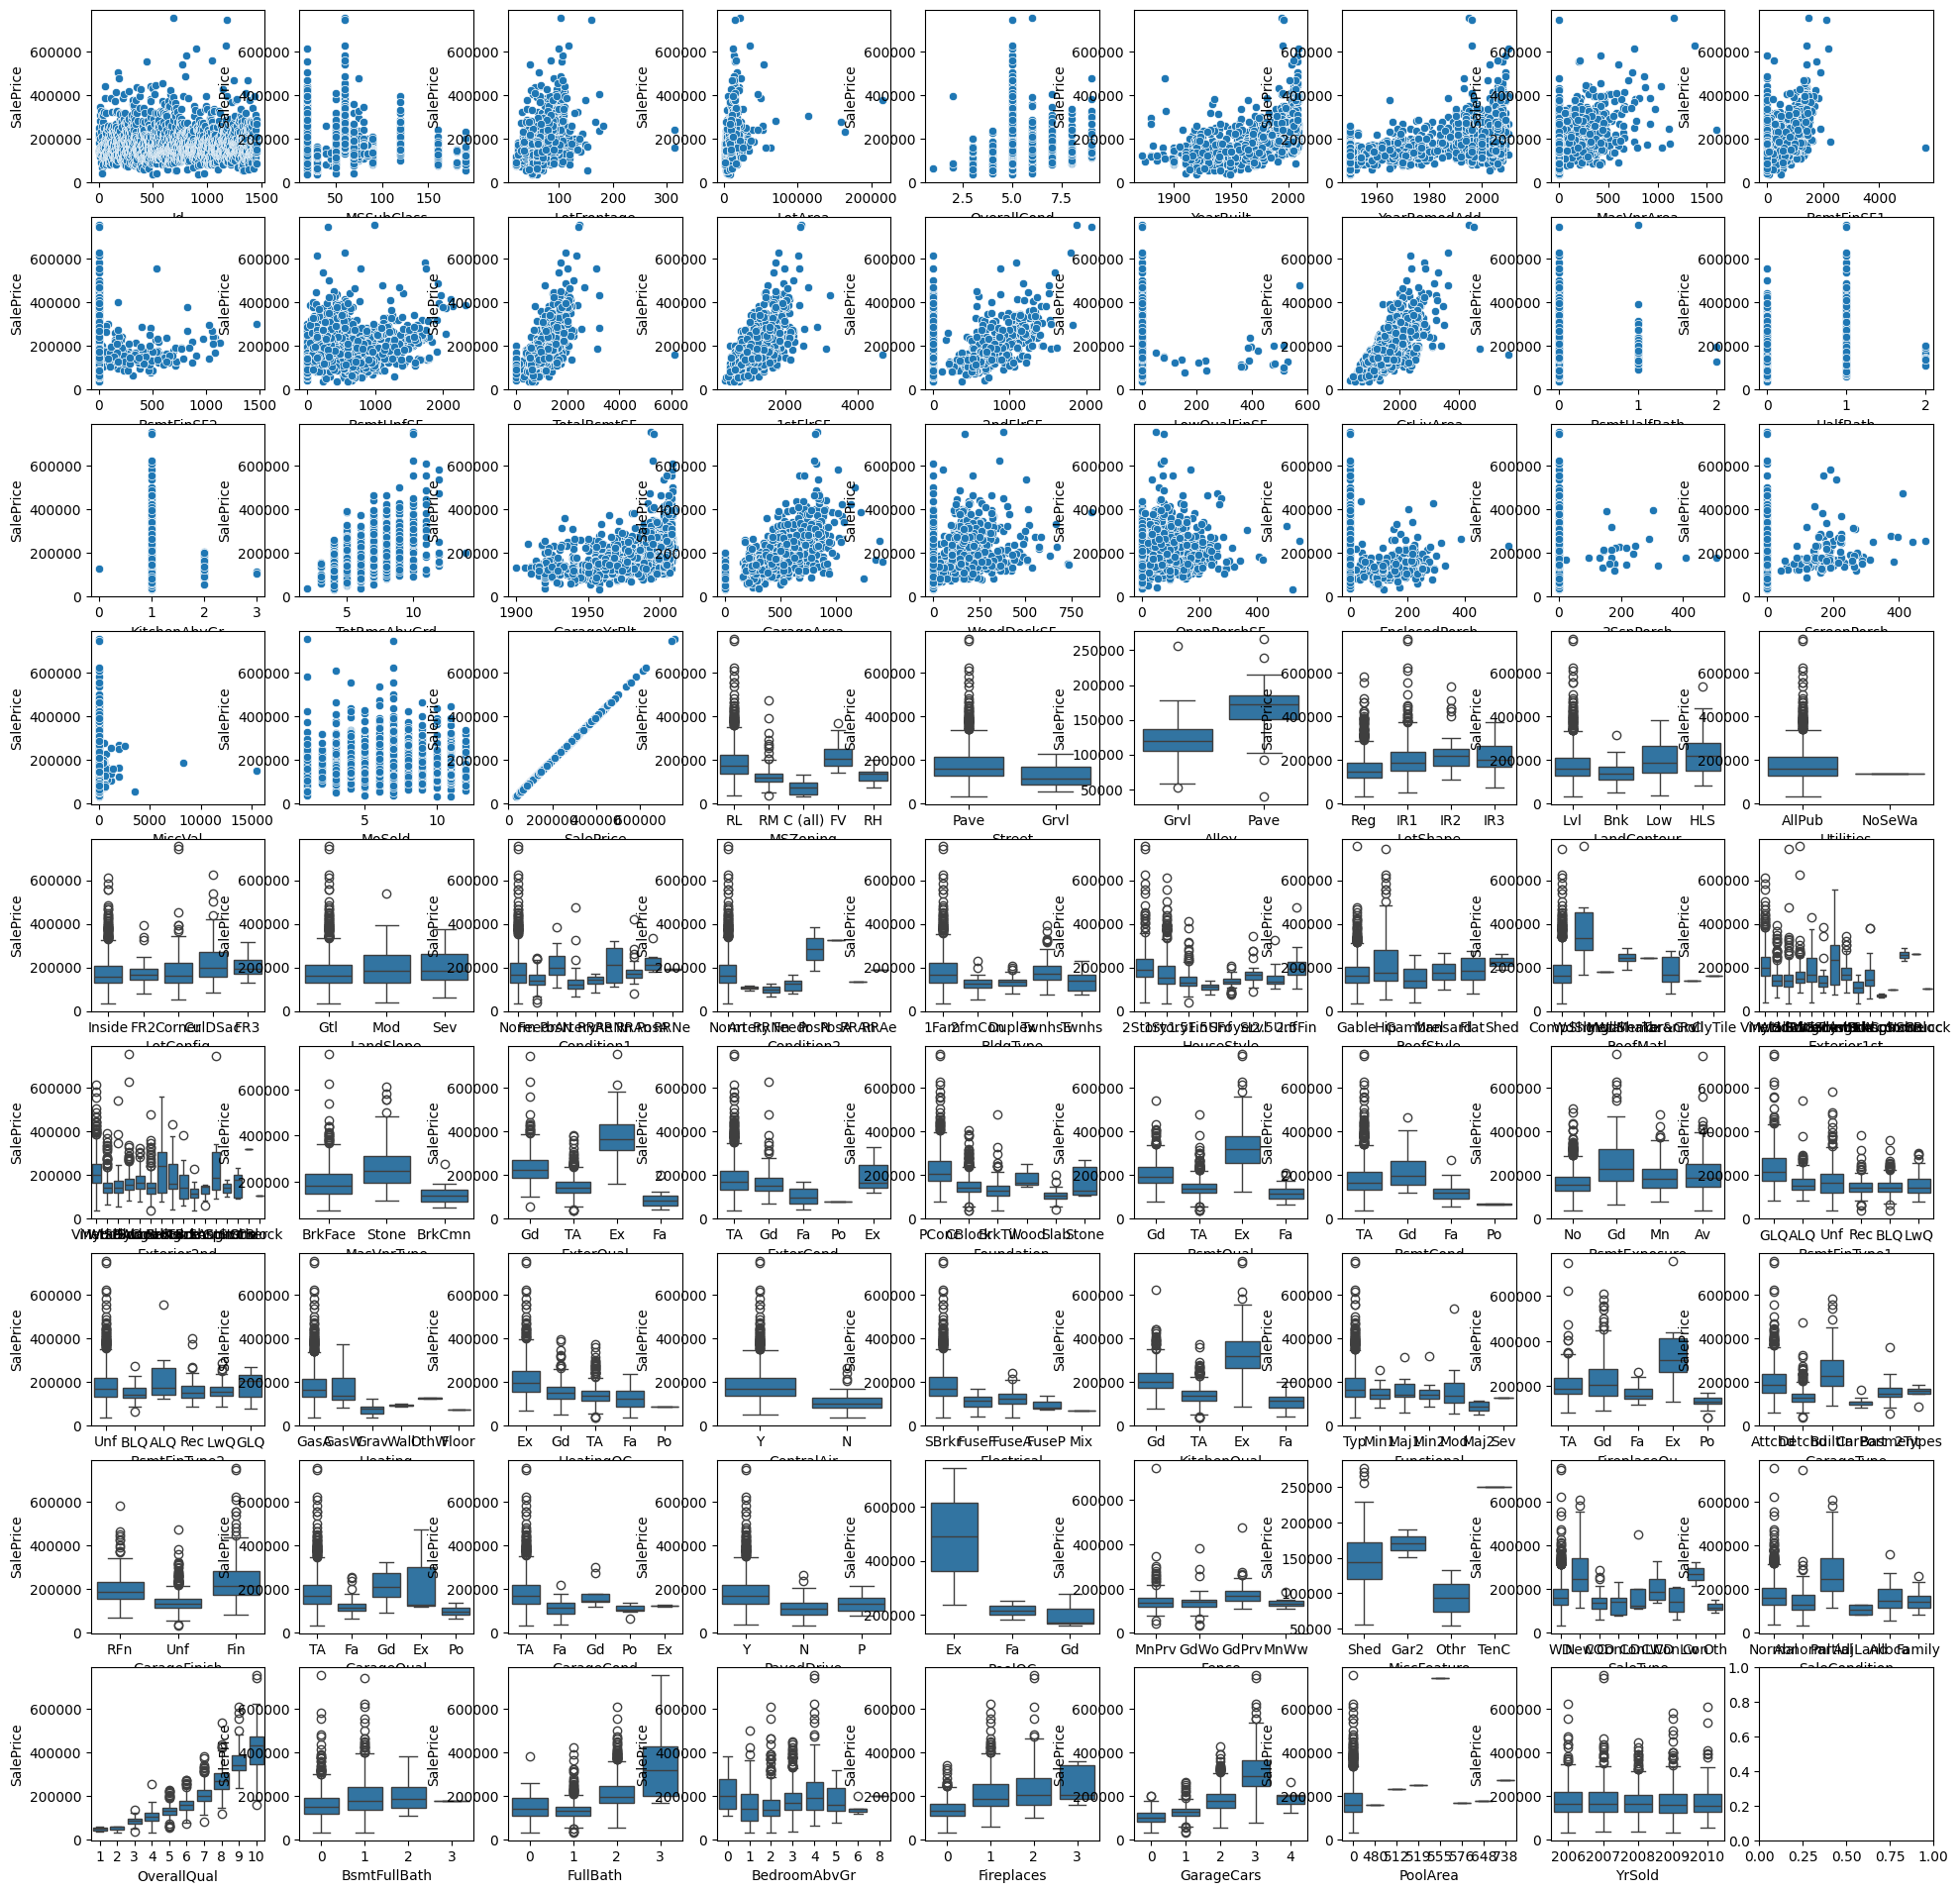

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
def separate_columns(df, cat_threshold=20):
    """
    Script for automatically separating numeric and categorical variables for small datasets.
    Returns: (numeric_cols, categorical_cols)
    """
    numeric_cols = []
    categorical_cols = []
    
    for col in df.columns:
        series = df[col].dropna()
        
        if len(series) == 0:
            continue        
        # Is it numeric dtype?
        if pd.api.types.is_numeric_dtype(series):
            numeric_cols.append(col)  # numeric
        elif series.nunique() >= cat_threshold: # High cardinality and not numeric -> ignore
            continue
        else:
            categorical_cols.append(col)
    return numeric_cols, categorical_cols
    
def visualize(df, Ycol, Ycat = True):
    numeric, categorical = separate_columns(df)
    c = math.ceil((len(numeric)+len(categorical))**0.5) # min size needed
    for s in numeric: # use box plot for ordinal variables
        if df[s].nunique() <= 10:
            numeric.remove(s)
            categorical.append(s)
        
    fig, axes = plt.subplots(c,c, figsize=(24,24))
    i=0
    if (Ycat): # Y categorical
        for s in numeric:
            sns.boxplot(data=df, x=Ycol, y=s, ax = axes[i//c][i%c])
            i+=1
        for s in categorical:
            sns.barplot(data=df, x=s, y=Ycol, ax = axes[i//c][i%c])
            i+=1
    else:
        for s in numeric:        
            sns.scatterplot(data = df, x=s, y=Ycol, ax = axes[i//c][i%c])
            i+=1
        for s in categorical:
            sns.boxplot(data = df, x=s, y=Ycol, ax = axes[i//c][i%c])
            i+=1
       
Ycol = 'SalePrice'
visualize(df, Ycol, False)

There are lots of variables in this dataset, and several of them seems to have good correlation with the SalePrice.

# Initial try: XGBoost with parameter selection

I use XGBoost as my model because there are lots of categorical variables in the dataset. Regression based method are not good at handling categorical variables (if use one-hot encoding, there will be even more variables and uncorrelated variables will create a lot of noise. 

There are also a lot of missing data in many of the columns, XGBoost can handle the missing values well automatically, requiring less feature engineering.

In [19]:
# XGBoost handles missing natively
import xgboost as xgb
import optuna
X = df.drop(columns = 'SalePrice')
trainlen = len(X)
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
X = pd.concat([X, test]) # preprocessing
num, cat = separate_columns(X)
X = pd.concat([X[num], X[cat]], axis = 1)
for s in cat:
    if (X[s].dtype == 'float64'):
        X[s] = X[s].astype(str)
    X[s] = X[s].astype('category')
Xtrain = X.iloc[:trainlen]
Xtest = X.iloc[trainlen:]
Y = df['SalePrice']
model = xgb.XGBRegressor(enable_categorical=True, random_state = 42)
param_dist = {
    'n_estimators': optuna.distributions.IntDistribution(50,200),
    'learning_rate':  optuna.distributions.FloatDistribution(0.0001, 1, log=True),
    'max_depth': optuna.distributions.IntDistribution(3, 10),
    'colsample_bytree': optuna.distributions.FloatDistribution(0.5, 1),
    'subsample': optuna.distributions.FloatDistribution(0.5, 1)
}
optuna_search = optuna.integration.OptunaSearchCV(
    estimator=model,
    param_distributions=param_dist,
    scoring='neg_root_mean_squared_log_error',
    cv=5,
    verbose=2,
    n_trials=100,
    n_jobs=-1 # Use all available processors
)
optuna_search.fit(Xtrain, Y)
print(f"Best parameters found: {optuna_search.best_params_}")
print(f"Best score found: {optuna_search.best_score_}")

/tmp/ipykernel_819/810381943.py:25: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = optuna.integration.OptunaSearchCV(
[I 2026-01-20 05:49:51,288] A new study created in memory with name: no-name-823e5484-e50a-4705-94b7-1c2c712d83b1
[I 2026-01-20 05:49:54,160] Trial 3 finished with value: -0.40522887706756594 and parameters: {'n_estimators': 67, 'learning_rate': 0.0001311885676616526, 'max_depth': 3, 'colsample_bytree': 0.9402499546470195, 'subsample': 0.6330269823116629}. Best is trial 3 with value: -0.40522887706756594.
[I 2026-01-20 05:50:04,304] Trial 1 finished with value: -0.3426505148410797 and parameters: {'n_estimators': 142, 'learning_rate': 0.001748416834555017, 'max_depth': 6, 'colsample_bytree': 0.9661678618088565, 'subsample': 0.9602765432335427}. Best is trial 1 with value: -0.3426505148410797.
[I 2026-01-20 05:50:07,062] Trial 2 finished with value: -0.15936378836631776 and parameter

Best parameters found: {'n_estimators': 163, 'learning_rate': 0.07520394229205152, 'max_depth': 4, 'colsample_bytree': 0.6148335518654758, 'subsample': 0.9691839456800646}
Best score found: -0.12685762196779252


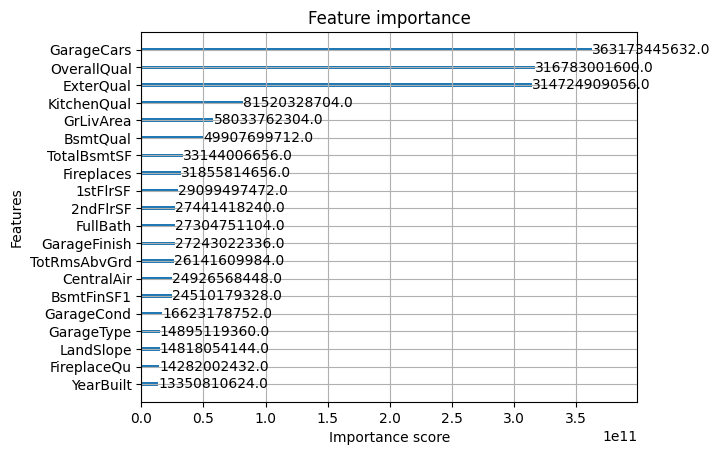

In [20]:
best_model = optuna_search.best_estimator_
xgb.plot_importance(best_model, max_num_features=20, importance_type='gain')
plt.show()

In [21]:
res = best_model.predict(Xtest)
res

array([126029.94, 157337.64, 178656.44, ..., 154411.9 , 117355.44,
       219029.73], dtype=float32)

In [22]:
test['SalePrice'] = res
test[['Id', 'SalePrice']].to_csv('output.csv', index=False)